In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
!git clone https://github.com/matterport/Mask_RCNN '/content/drive/MyDrive/colab/Mask_RCNN'

fatal: destination path '/content/drive/MyDrive/colab/Mask_RCNN' already exists and is not an empty directory.


In [20]:
# !python3 '/content/drive/MyDrive/colab/Mask_RCNN/samples/balloon/balloon.py' --weights=coco 이 때 오류남 -> tensorflow 최신버전 깔려있어서 안 됨 

In [21]:
!pip list #버전 확인 가능

Package                       Version       
----------------------------- --------------
absl-py                       0.12.0        
alabaster                     0.7.12        
albumentations                0.1.12        
altair                        4.1.0         
appdirs                       1.4.4         
argon2-cffi                   20.1.0        
arviz                         0.11.2        
astor                         0.8.1         
astropy                       4.2.1         
astunparse                    1.6.3         
async-generator               1.10          
atari-py                      0.2.9         
atomicwrites                  1.4.0         
attrs                         21.2.0        
audioread                     2.1.9         
autograd                      1.3           
Babel                         2.9.1         
backcall                      0.2.0         
beautifulsoup4                4.6.3         
bleach                        3.3.0         
blis      

Mask_RCNN 소스는 tensorflow 1.x 버전인데, 현재 tensorflow 버전이 2.x 
-> tensorflow downgrade 진행


로컬에서 실험에 성공한 라이브러리 버전 정보 :

tensorboard 1.15.0

tensorflow 1.15.0

tensorflow-estimater 1.15.1

tensorflow-gpu 1.15.2

tensorflow-gpu-estimator 2.1.0

​

Keras 2.2.5

Keras-Applications 1.0.8

Keras-Preprocessing 1.1.0

In [22]:
!pip install tensorboard==1.15.0 tensorflow==1.15.0 tensorflow-estimator==1.15.1 tensorflow-gpu==1.15.2 tensorflow-gpu-estimator==2.1.0 Keras==2.2.5 Keras-Applications==1.0.8 Keras-Preprocessing==1.1.0

  Using cached https://files.pythonhosted.org/packages/f8/ba/2d058dcf1b85b9c212cc58264c98a4a7dd92c989b798823cc5690d062bb2/Keras-2.2.5-py2.py3-none-any.whl
  Found existing installation: Keras 2.1.6
    Uninstalling Keras-2.1.6:
      Successfully uninstalled Keras-2.1.6


In [23]:
#이거 없이 밑의 셀 실행시키면 module 'tensorflow._api.v1.compat.v2.has no attribute '__internal__' google colab error 에러 뜸

!pip3 uninstall keras-nightly
!pip3 uninstall -y tensorflow
!pip3 install keras==2.1.6
!pip3 install tensorflow==1.15.0
!pip3 install h5py==2.10.0

Uninstalling tensorflow-1.15.0:
  Successfully uninstalled tensorflow-1.15.0
  Using cached https://files.pythonhosted.org/packages/54/e8/eaff7a09349ae9bd40d3ebaf028b49f5e2392c771f294910f75bb608b241/Keras-2.1.6-py2.py3-none-any.whl
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5
  Using cached https://files.pythonhosted.org/packages/92/2b/e3af15221da9ff323521565fa3324b0d7c7c5b1d7a8ca66984c8d59cb0ce/tensorflow-1.15.0-cp37-cp37m-manylinux2010_x86_64.whl
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.15.0 which is incompatible.


### mask_rcnn_balloon.h5가 이미 학습을 완료하여 얻은 weight가 있긴한데 직접 training

balloon.py 파일에 사용법이 있음 

In [24]:
!python3 '/content/drive/MyDrive/colab/Mask_RCNN/samples/balloon/balloon.py' train --dataset='/content/drive/MyDrive/balloon_dataset/balloon' --weights=coco 

Using TensorFlow backend.
Weights:  coco
Dataset:  /content/drive/MyDrive/balloon_dataset/balloon
Logs:  /content/drive/MyDrive/colab/Mask_RCNN/logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0,

위 학습에 의해 얻어진 weight는 logs 폴더 안에 있음
=> 각 epoch별로 저장되어 있음

epoch 30 경로 복사해서 써줌

In [25]:
!python3 '/content/drive/MyDrive/colab/Mask_RCNN/samples/balloon/balloon.py' splash --weights='/content/drive/MyDrive/colab/Mask_RCNN/logs/balloon20210708T0955/mask_rcnn_balloon_0030.h5' --image='/content/drive/MyDrive/balloon_dataset/balloon/val/2917282960_06beee649a_b.jpg'

Using TensorFlow backend.
Weights:  /content/drive/MyDrive/colab/Mask_RCNN/logs/balloon20210708T0955/mask_rcnn_balloon_0030.h5
Dataset:  None
Logs:  /content/drive/MyDrive/colab/Mask_RCNN/logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGH

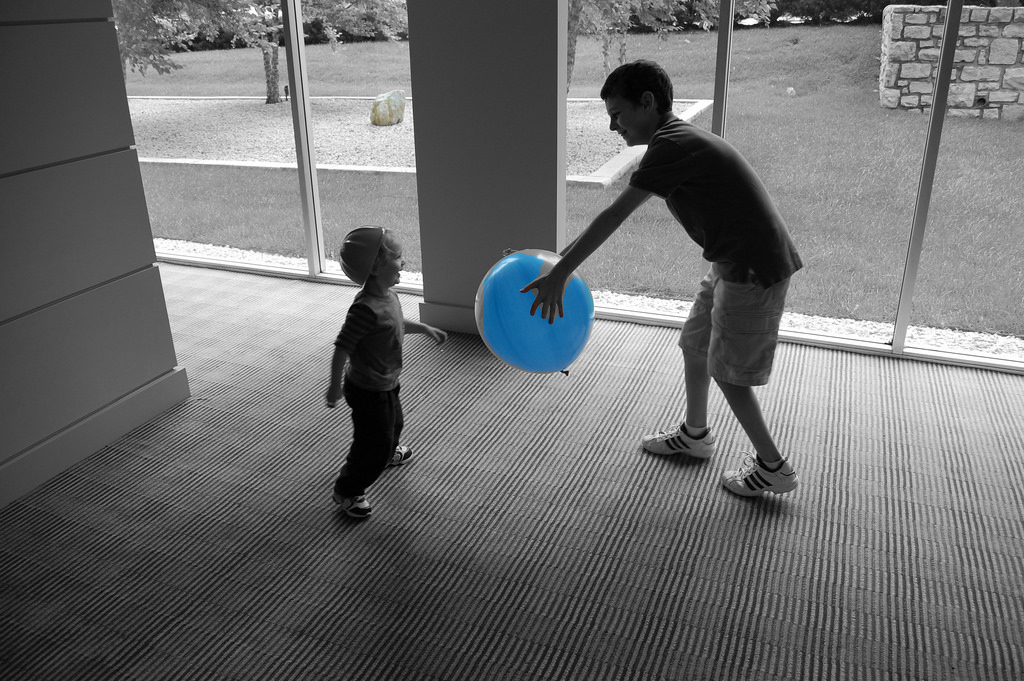

In [30]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/splash_20210708T122021.png')
cv2_imshow(img)

참고 사이트 : 
https://m.blog.naver.com/adamdoha/221906246483

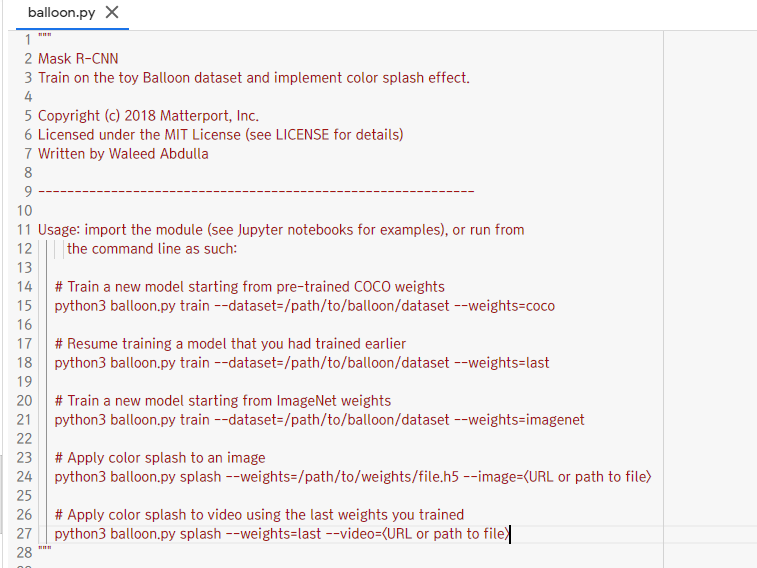

usage 나와있는 거 balloon.py 상단에 있음